## Homework 2 - Social Media

## Part A - Provide an explination of how you chose the number of topics

## Part B - Topic Modeling

In [1]:
import os
from os import path
root = "Data for Assignment 2"
files = os.listdir(root)

#load speeches into a list
docs = list() 
names = list()
for file in files: 
    names.append(file)
    with open(path.join(root, file), 'r') as fd:
        txt = fd.read()
        docs.append(txt)

In [2]:
# clean speeches
import re 
def clean(doc):
    doc = re.sub(r'[^\w\s]*', '', doc) 
    doc = re.sub(r'[\s]+', ' ', doc)
    doc = doc.lower().strip()
    return doc

clean_docs = list()
for doc in docs:
    doc = clean(doc)
    clean_docs.append(doc)

#tokenize speeches
token_docs = list()
for doc in clean_docs:
    token_docs.append(doc.split())

In [5]:
#remove stopwords
import nltk
# nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english'))
addtl_sw = ['people', 'country', 'mr', 'would', 'us', 'may', 'we', 'upon', 'must', 'united', 'states', 'year',
           'q', 'americans', 'american', 'government', 'new', 'world', 'one', 'shall']
# for item in addtl_sw:
#     stopwords = stopwords.append(addtl_sw)

sw_token_docs = list()
for doc in token_docs:
    sw_doc = list()
    for token in doc:
        if not token in stopwords and not token in addtl_sw:
            sw_doc.append(token)
    sw_token_docs.append(sw_doc)

In [6]:
# perform topic modelling
# sw_token_docs = sw_token_docs[-10:]
import logging, gensim
from gensim import corpora, models, similarities
dictionary = corpora.Dictionary(sw_token_docs)
corpus = [dictionary.doc2bow(doc) for doc in sw_token_docs]

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
lda = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, update_every=1, passes=20)

2018-02-19 12:33:11,818 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-02-19 12:33:13,225 : INFO : built Dictionary(38595 unique tokens: [u'tripolitan', u'2minute', u'deferment', u'woods', u'spiders']...) from 666 documents (total 988208 corpus positions)
2018-02-19 12:33:14,301 : INFO : using symmetric alpha at 0.05
2018-02-19 12:33:14,302 : INFO : using symmetric eta at 0.05
2018-02-19 12:33:14,309 : INFO : using serial LDA version on this node
2018-02-19 12:33:18,030 : INFO : running online (multi-pass) LDA training, 20 topics, 20 passes over the supplied corpus of 666 documents, updating model once every 666 documents, evaluating perplexity every 666 documents, iterating 50x with a convergence threshold of 0.001000
2018-02-19 12:33:31,723 : INFO : -12.444 per-word bound, 5572.7 perplexity estimate based on a held-out corpus of 666 documents with 988208 words
2018-02-19 12:33:31,723 : INFO : PROGRESS: pass 0, at document #666/666
2018-02-19 12:33:34,362 : INFO :

2018-02-19 12:34:33,312 : INFO : topic #13 (0.050): 0.007*"congress" + 0.005*"made" + 0.004*"last" + 0.004*"treaty" + 0.004*"time" + 0.004*"treasury" + 0.003*"citizens" + 0.003*"relations" + 0.003*"silver" + 0.003*"public"
2018-02-19 12:34:33,314 : INFO : topic #3 (0.050): 0.005*"america" + 0.005*"peace" + 0.005*"years" + 0.005*"freedom" + 0.005*"every" + 0.004*"nation" + 0.004*"time" + 0.004*"great" + 0.004*"many" + 0.004*"men"
2018-02-19 12:34:33,316 : INFO : topic diff=0.808984, rho=0.377964
2018-02-19 12:34:42,738 : INFO : -8.557 per-word bound, 376.5 perplexity estimate based on a held-out corpus of 666 documents with 988208 words
2018-02-19 12:34:42,739 : INFO : PROGRESS: pass 6, at document #666/666
2018-02-19 12:34:45,315 : INFO : topic #6 (0.050): 0.007*"president" + 0.006*"iraq" + 0.005*"america" + 0.004*"war" + 0.004*"time" + 0.004*"energy" + 0.004*"congress" + 0.004*"soviet" + 0.003*"oil" + 0.003*"nations"
2018-02-19 12:34:45,316 : INFO : topic #10 (0.050): 0.008*"soviet" +

2018-02-19 12:35:45,761 : INFO : topic #17 (0.050): 0.011*"war" + 0.008*"peace" + 0.007*"nations" + 0.004*"every" + 0.004*"men" + 0.004*"great" + 0.004*"nation" + 0.004*"free" + 0.004*"time" + 0.004*"many"
2018-02-19 12:35:45,762 : INFO : topic #9 (0.050): 0.020*"bank" + 0.009*"act" + 0.007*"stockholders" + 0.007*"stock" + 0.004*"court" + 0.004*"disabilities" + 0.003*"corporation" + 0.003*"day" + 0.002*"privileges" + 0.002*"nation"
2018-02-19 12:35:45,765 : INFO : topic diff=0.196029, rho=0.277350
2018-02-19 12:35:55,005 : INFO : -8.471 per-word bound, 354.8 perplexity estimate based on a held-out corpus of 666 documents with 988208 words
2018-02-19 12:35:55,006 : INFO : PROGRESS: pass 12, at document #666/666
2018-02-19 12:35:57,193 : INFO : topic #14 (0.050): 0.004*"china" + 0.004*"america" + 0.003*"said" + 0.003*"relations" + 0.003*"president" + 0.003*"persons" + 0.003*"peoples" + 0.003*"republic" + 0.002*"citizens" + 0.002*"day"
2018-02-19 12:35:57,195 : INFO : topic #18 (0.050): 0

2018-02-19 12:36:59,728 : INFO : topic #16 (0.050): 0.007*"foreign" + 0.004*"state" + 0.004*"service" + 0.004*"international" + 0.004*"countries" + 0.003*"department" + 0.003*"made" + 0.003*"china" + 0.003*"great" + 0.003*"trade"
2018-02-19 12:36:59,729 : INFO : topic #17 (0.050): 0.012*"war" + 0.009*"peace" + 0.007*"nations" + 0.005*"men" + 0.005*"every" + 0.004*"great" + 0.004*"nation" + 0.004*"free" + 0.004*"time" + 0.004*"freedom"
2018-02-19 12:36:59,732 : INFO : topic diff=0.070490, rho=0.229416
2018-02-19 12:37:10,111 : INFO : -8.446 per-word bound, 348.8 perplexity estimate based on a held-out corpus of 666 documents with 988208 words
2018-02-19 12:37:10,112 : INFO : PROGRESS: pass 18, at document #666/666
2018-02-19 12:37:12,307 : INFO : topic #18 (0.050): 0.005*"great" + 0.005*"congress" + 0.005*"public" + 0.004*"made" + 0.004*"state" + 0.003*"citizens" + 0.003*"power" + 0.003*"time" + 0.003*"war" + 0.003*"every"
2018-02-19 12:37:12,309 : INFO : topic #2 (0.050): 0.037*"presid

In [7]:
t=0
for i in lda.show_topics(num_topics=20, num_words=20, log=False, formatted=True):
    print "Topic # ", t , i
    t = t + 1

Topic #  0 (0, u'0.009*"president" + 0.008*"slavery" + 0.006*"watergate" + 0.005*"question" + 0.005*"house" + 0.005*"carter" + 0.004*"missouri" + 0.004*"say" + 0.004*"first" + 0.004*"white" + 0.004*"federal" + 0.004*"also" + 0.003*"know" + 0.003*"made" + 0.003*"principle" + 0.003*"ford" + 0.003*"governor" + 0.003*"think" + 0.003*"believe" + 0.003*"facts"')
Topic #  1 (1, u'0.008*"america" + 0.007*"peace" + 0.006*"nations" + 0.005*"great" + 0.005*"nation" + 0.004*"years" + 0.004*"today" + 0.004*"time" + 0.004*"work" + 0.004*"human" + 0.004*"war" + 0.004*"let" + 0.003*"together" + 0.003*"first" + 0.003*"day" + 0.003*"freedom" + 0.003*"every" + 0.003*"hope" + 0.003*"future" + 0.003*"president"')
Topic #  2 (2, u'0.037*"president" + 0.023*"think" + 0.014*"vietnam" + 0.007*"made" + 0.007*"going" + 0.006*"time" + 0.006*"south" + 0.005*"congress" + 0.005*"could" + 0.005*"dont" + 0.005*"secretary" + 0.005*"believe" + 0.004*"general" + 0.004*"said" + 0.004*"good" + 0.004*"question" + 0.004*"see

In [8]:
count=1
for doc in sw_token_docs:
    vec = dictionary.doc2bow(doc)
    print "Speech # ", count, lda[vec]
    #print first 100 words of speech to verify correct speech
    print doc[0:100]
    count = count + 1

Speech #  1 [(14, 0.05794514), (18, 0.9405672)]
['fellow', 'citizens', 'senate', 'house', 'representatives', 'among', 'vicissitudes', 'incident', 'life', 'event', 'could', 'filled', 'greater', 'anxieties', 'notification', 'transmitted', 'order', 'received', 'fourteenth', 'day', 'present', 'month', 'hand', 'summoned', 'whose', 'voice', 'never', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hopes', 'immutable', 'decision', 'asylum', 'declining', 'years', 'retreat', 'rendered', 'every', 'day', 'necessary', 'well', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruptions', 'health', 'gradual', 'waste', 'committed', 'time', 'hand', 'magnitude', 'difficulty', 'trust', 'voice', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizens', 'distrustful', 'scrutiny', 'qualification', 'could', 'overwhelm', 'dispondence', 'inheriting', 'inferior', 'endowments', 'nature', 'unpractised', 'duties', 'civil', 'administration', 'ough

['senate', 'house', 'representatives', 'circumstances', 'fellowcitizens', 'seriously', 'threatened', 'peace', 'made', 'duty', 'convene', 'earlier', 'period', 'usual', 'love', 'peace', 'much', 'cherished', 'bosoms', 'citizens', 'long', 'guided', 'proceedings', 'public', 'councils', 'induced', 'forbearance', 'many', 'wrongs', 'insure', 'continuance', 'quiet', 'pursuits', 'industry', 'many', 'injuries', 'depredations', 'committed', 'commerce', 'navigation', 'high', 'seas', 'years', 'past', 'successive', 'innovations', 'principles', 'public', 'law', 'established', 'reason', 'usage', 'nations', 'peace', 'circumstances', 'induced', 'extraordinary', 'mission', 'london', 'already', 'known', 'instructions', 'given', 'ministers', 'framed', 'sincerest', 'spirit', 'amity', 'moderation', 'accordingly', 'proceeded', 'conformity', 'therewith', 'propose', 'arrangements', 'might', 'embrace', 'settle', 'points', 'difference', 'mutual', 'understanding', 'neutral', 'national', 'rights', 'provide', 'commer

Speech #  96 [(2, 0.043514963), (9, 0.084054127), (18, 0.87000924)]
['whereas', 'act', 'congress', 'passed', '29th', 'day', '1830', 'provided', 'whenever', 'president', 'receive', 'satisfactory', 'evidence', 'great', 'britain', 'open', 'ports', 'colonial', 'possessions', 'west', 'indies', 'continent', 'south', 'america', 'bahama', 'islands', 'caicos', 'bermuda', 'somer', 'islands', 'vessels', 'indefinite', 'limited', 'term', 'vessels', 'cargoes', 'entering', 'colonial', 'ports', 'aforesaid', 'subject', 'higher', 'duties', 'tonnage', 'impost', 'charges', 'description', 'imposed', 'british', 'vessels', 'cargoes', 'arriving', 'said', 'colonial', 'possessions', 'vessels', 'import', 'said', 'colonial', 'possessions', 'article', 'articles', 'could', 'imported', 'british', 'vessel', 'said', 'possessions', 'vessels', 'export', 'british', 'colonies', 'aforementioned', 'whatever', 'dominions', 'possessions', 'great', 'britain', 'article', 'articles', 'exported', 'therefrom', 'british', 'vessel',

Speech #  128 [(3, 0.018231977), (18, 0.98104227)]
['fellowcitizens', 'appear', 'day', 'take', 'solemn', 'oath', 'faithfully', 'execute', 'office', 'president', 'best', 'ability', 'preserve', 'protect', 'defend', 'constitution', 'entering', 'great', 'office', 'humbly', 'invoke', 'god', 'fathers', 'wisdom', 'firmness', 'execute', 'high', 'responsible', 'duties', 'manner', 'restore', 'harmony', 'ancient', 'friendship', 'among', 'several', 'preserve', 'free', 'institutions', 'throughout', 'many', 'generations', 'convinced', 'owe', 'election', 'inherent', 'love', 'constitution', 'union', 'still', 'animates', 'hearts', 'let', 'earnestly', 'ask', 'powerful', 'support', 'sustaining', 'measures', 'calculated', 'perpetuate', 'richest', 'political', 'blessings', 'heaven', 'ever', 'bestowed', 'nation', 'determined', 'become', 'candidate', 'reelection', 'motive', 'influence', 'conduct', 'administering', 'except', 'desire', 'ably', 'faithfully', 'serve', 'live', 'grateful', 'memory', 'countrymen', 

Speech #  157 [(2, 0.041489538), (3, 0.06463889), (18, 0.85268396), (19, 0.040448181)]
['fellowcitizens', 'assembled', 'repeat', 'public', 'ceremonial', 'begun', 'washington', 'observed', 'predecessors', 'time', 'honored', 'custom', 'marks', 'commencement', 'term', 'presidential', 'office', 'called', 'duties', 'great', 'trust', 'proceed', 'compliance', 'usage', 'announce', 'leading', 'principles', 'subjects', 'chiefly', 'engage', 'public', 'attention', 'desire', 'guided', 'discharge', 'duties', 'undertake', 'lay', 'irrevocably', 'principles', 'measures', 'administration', 'rather', 'speak', 'motives', 'animate', 'suggest', 'certain', 'important', 'ends', 'attained', 'accordance', 'institutions', 'essential', 'welfare', 'outset', 'discussions', 'preceded', 'recent', 'presidential', 'election', 'seemed', 'fitting', 'fully', 'make', 'known', 'sentiments', 'regard', 'several', 'important', 'questions', 'appeared', 'demand', 'consideration', 'following', 'example', 'part', 'adopting', 'lang

Speech #  176 [(13, 0.34249067), (18, 0.26905948), (19, 0.38727227)]
['senate', 'house', 'representatives', 'submitting', 'annual', 'message', 'congress', 'great', 'satisfaction', 'able', 'say', 'general', 'conditions', 'affecting', 'commercial', 'industrial', 'interests', 'highest', 'degree', 'favorable', 'comparison', 'existing', 'conditions', 'favored', 'period', 'history', 'believe', 'show', 'high', 'degree', 'prosperity', 'general', 'diffusion', 'comforts', 'life', 'never', 'enjoyed', 'total', 'wealth', '1860', '16159616068', '1890', 'amounted', '62610000000', 'increase', '287', 'per', 'cent', 'total', 'mileage', 'railways', '1860', '30626', '1890', '167741', 'increase', '448', 'per', 'cent', 'estimated', '4000', 'miles', 'track', 'added', 'close', '1892', 'official', 'returns', 'eleventh', 'census', 'tenth', 'census', 'seventyfive', 'leading', 'cities', 'furnish', 'basis', 'following', 'comparisons', '1880', 'capital', 'invested', 'manufacturing', '1232839670', '1890', 'capital',

['fellowcitizens', 'anyone', 'taken', 'oath', 'taken', 'feel', 'heavy', 'weight', 'responsibility', 'conception', 'powers', 'duties', 'office', 'enter', 'lacking', 'proper', 'sense', 'obligation', 'oath', 'imposes', 'office', 'inaugural', 'address', 'give', 'summary', 'outline', 'main', 'policies', 'administration', 'far', 'anticipated', 'honor', 'advisers', 'distinguished', 'predecessor', 'hold', 'hands', 'reforms', 'initiated', 'untrue', 'promises', 'declarations', 'party', 'platform', 'elected', 'office', 'make', 'maintenance', 'enforcement', 'reforms', 'important', 'feature', 'administration', 'directed', 'suppression', 'lawlessness', 'abuses', 'power', 'great', 'combinations', 'capital', 'invested', 'railroads', 'industrial', 'enterprises', 'carrying', 'interstate', 'commerce', 'steps', 'predecessor', 'took', 'legislation', 'passed', 'recommendation', 'accomplished', 'much', 'caused', 'general', 'halt', 'vicious', 'policies', 'created', 'popular', 'alarm', 'brought', 'business', '

Speech #  226 [(17, 0.025847692), (18, 0.29909876), (19, 0.6743632)]
['members', 'congress', 'many', 'problems', 'calling', 'solution', 'recital', 'face', 'known', 'limitations', 'short', 'session', 'congress', 'seem', 'lack', 'sincerity', 'purpose', 'four', 'years', 'since', 'war', 'ended', 'inevitable', 'readjustment', 'social', 'economic', 'order', 'barely', 'begun', 'acceptance', 'prewar', 'conditions', 'anywhere', 'general', 'way', 'humanity', 'harbors', 'individual', 'wishes', 'go', 'wartime', 'compensation', 'production', 'prewar', 'requirements', 'expenditure', 'short', 'everyone', 'speaking', 'broadly', 'craves', 'readjustment', 'everybody', 'except', 'permanent', 'readjustment', 'except', 'participate', 'civilization', 'measured', 'strength', 'genius', 'power', 'science', 'resources', 'industries', 'addition', 'testing', 'limits', 'man', 'power', 'endurance', 'heroism', 'men', 'womenthat', 'civilization', 'brought', 'severest', 'test', 'restoring', 'tranquil', 'order', 'commi

Speech #  251 [(11, 0.74414068), (17, 0.14687285), (19, 0.10785295)]
['glad', 'come', 'chicago', 'especially', 'opportunity', 'taking', 'part', 'dedication', 'important', 'project', 'civic', 'betterment', 'trip', 'across', 'continent', 'back', 'shown', 'many', 'evidences', 'result', 'common', 'sense', 'cooperation', 'municipalities', 'federal', 'greeted', 'tens', 'thousands', 'told', 'every', 'look', 'word', 'material', 'spiritual', 'wellbeing', 'made', 'great', 'strides', 'forward', 'past', 'years', 'yet', 'seen', 'eyes', 'prosperous', 'farms', 'thriving', 'factories', 'busy', 'railroads', 'seen', 'happiness', 'security', 'peace', 'covers', 'wide', 'land', 'almost', 'inevitably', 'compelled', 'contrast', 'peace', 'different', 'scenes', 'enacted', 'parts', 'modern', 'conditions', 'sake', 'future', 'give', 'thought', 'rest', 'responsible', 'executive', 'head', 'nation', 'chosen', 'great', 'inland', 'city', 'gala', 'occasion', 'speak', 'subject', 'definite', 'national', 'importance', 'po

Speech #  286 [(2, 0.016512912), (17, 0.98313594)]
['hope', 'pardon', 'unusual', 'posture', 'sitting', 'presentation', 'want', 'say', 'know', 'realize', 'makes', 'lot', 'easier', 'carry', 'ten', 'pounds', 'steel', 'around', 'bottom', 'legs', 'also', 'fact', 'completed', 'fourteenthousandmile', 'trip', 'first', 'want', 'say', 'good', 'home', 'long', 'journey', 'hope', 'also', 'agree', 'far', 'fruitful', 'speaking', 'frankness', 'question', 'whether', 'entirely', 'fruitful', 'lies', 'great', 'extent', 'hands', 'unless', 'halls', 'congress', 'support', 'peopleconcur', 'general', 'conclusions', 'reached', 'yalta', 'give', 'active', 'support', 'meeting', 'produced', 'lasting', 'results', 'come', 'earliest', 'hour', 'could', 'return', 'want', 'make', 'personal', 'report', 'youand', 'time', 'many', 'months', 'earnest', 'work', 'ahead', 'like', 'feel', 'last', 'stone', 'laid', 'structure', 'international', 'peace', 'achievement', 'america', 'worked', 'steadfastly', 'unselfishlytogether', 'retu

Speech #  322 [(3, 0.23178262), (10, 0.032753661), (17, 0.63296509), (19, 0.098174281)]
['today', 'signed', 'executive', 'order', 'providing', 'establishment', 'peace', 'corps', 'temporary', 'pilot', 'basis', 'also', 'sending', 'congress', 'message', 'proposing', 'authorization', 'permanent', 'peace', 'corps', 'corps', 'pool', 'trained', 'men', 'women', 'sent', 'overseas', 'private', 'institutions', 'organizations', 'help', 'foreign', 'countries', 'meet', 'urgent', 'needs', 'skilled', 'manpower', 'hope', '500', 'field', 'end', 'initial', 'reactions', 'peace', 'corps', 'proposal', 'convincing', 'proof', 'immense', 'reservoir', 'men', 'womenanxious', 'sacrifice', 'energies', 'time', 'toil', 'cause', 'peace', 'human', 'progress', 'establishing', 'peace', 'corps', 'intend', 'make', 'full', 'use', 'resources', 'talents', 'private', 'institutions', 'groups', 'universities', 'voluntary', 'agencies', 'labor', 'unions', 'industry', 'asked', 'share', 'effortcontributing', 'diverse', 'sources', '

['senator', 'moss', 'old', 'colleague', 'senate', 'distinguished', 'senator', 'moss', 'president', 'mckay', 'brown', 'secretary', 'udall', 'governor', 'rawlings', 'ladies', 'gentlemen', 'appreciate', 'welcome', 'proud', 'back', 'historic', 'building', 'opportunity', 'say', 'words', 'matters', 'concern', 'president', 'hope', 'concern', 'citizens', 'fact', 'take', 'strength', 'hope', 'seeing', 'monument', 'hearing', 'story', 'retold', 'ted', 'moss', 'recalling', 'state', 'built', 'started', 'stories', 'pioneers', 'settlers', 'none', 'inspiring', 'mormon', 'trail', 'qualities', 'founders', 'community', 'qualities', 'seek', 'america', 'qualities', 'like', 'feel', 'courage', 'patience', 'faith', 'selfreliance', 'perseverance', 'unflagging', 'determination', 'see', 'right', 'prevail', 'came', 'trip', 'see', 'assure', 'nothing', 'encouraging', 'work', 'washington', 'chance', 'fly', 'across', 'drive', 'see', 'great', 'come', 'understand', 'somewhat', 'better', 'able', 'many', 'years', 'carry',

Speech #  380 [(2, 0.48794866), (3, 0.39491597), (10, 0.026710633), (17, 0.040942971), (18, 0.04114031)]
['president', 'good', 'afternoon', 'ladies', 'gentlemen', 'march', 'week', 'brought', 'deep', 'painful', 'challenge', 'unending', 'search', 'freedom', 'challenge', 'yet', 'ended', 'every', 'resource', 'directed', 'insuring', 'justice', 'men', 'races', 'alabama', 'everywhere', 'land', 'meaning', 'oath', 'swore', 'almighty', 'god', 'took', 'office', 'presidency', 'believe', 'heart', 'demand', 'last', 'sunday', 'group', 'negro', 'selma', 'alabama', 'attempted', 'peacefully', 'protest', 'denial', 'basic', 'political', 'right', 'allthe', 'right', 'vote', 'attacked', 'brutally', 'beaten', 'moment', 'acted', 'effectively', 'protect', 'constitutional', 'rights', 'citizens', 'selma', 'prevent', 'violence', 'lawlessness', 'wherever', 'occurred', '70', 'officials', 'including', 'fbi', 'agents', 'including', 'justice', 'department', 'lawyers', 'governor', 'collins', 'assistant', 'attorney', 'ge

['frank', 'cormier', 'associated', 'press', 'president', 'reaction', 'talk', 'hanoi', 'possible', 'war', 'crimes', 'trials', 'prisoners', 'might', 'consequences', 'action', 'president', 'feel', 'strongly', 'frank', 'men', 'military', 'men', 'carrying', 'military', 'assignments', 'line', 'duty', 'military', 'targets', 'war', 'criminals', 'treated', 'ready', 'whenever', 'hanoi', 'ready', 'sit', 'conference', 'table', 'sponsorship', 'international', 'committee', 'red', 'cross', 'discuss', 'ways', 'geneva', 'conventions', '1949', 'given', 'fuller', 'complete', 'application', 'vietnam', 'think', 'thought', 'boys', 'committed', 'war', 'crimes', 'deplorable', 'repulsive', 'taken', 'every', 'step', 'considers', 'appropriate', 'see', 'proper', 'representations', 'subject', 'made', 'merriman', 'smith', 'press', 'international', 'president', 'connection', 'war', 'vietnam', 'recurrence', 'requests', 'recommendations', 'halt', 'bombing', 'north', 'vietnam', 'requests', 'come', 'everybody', 'indian'

['speaker', 'president', 'colleagues', 'congress', 'distinguished', 'guests', 'fellow', 'address', 'joint', 'session', 'congress', 'great', 'chamber', 'privileged', 'serve', 'honor', 'deeply', 'grateful', 'state', 'union', 'address', 'traditionally', 'occasion', 'lengthy', 'detailed', 'account', 'president', 'accomplished', 'past', 'wants', 'congress', 'future', 'election', 'lay', 'basis', 'political', 'issues', 'might', 'decisive', 'fall', 'occasionally', 'comes', 'time', 'profound', 'farreaching', 'events', 'command', 'break', 'tradition', 'time', 'say', '1970', 'marks', 'beginning', 'decade', 'america', 'celebrate', '200th', 'birthday', 'say', 'knowledge', 'hard', 'experience', 'argue', 'persuasively', 'programs', 'institutions', 'america', 'need', 'reformed', 'moment', 'arrived', 'harness', 'vast', 'energies', 'abundance', 'land', 'creation', 'experience', 'experience', 'richer', 'deeper', 'truly', 'reflection', 'goodness', 'grace', 'human', 'spirit', '70s', 'time', 'beginnings', '

Speech #  455 [(1, 0.8075977), (2, 0.041013584), (3, 0.011561025), (4, 0.056955051), (10, 0.082187116)]
['president', 'president', 'hurley', 'senator', 'johnston', 'good', 'friends', 'house', 'representatives', 'eddie', 'hebert', 'dave', 'treen', 'lindy', 'boggs', 'lieutenant', 'governor', 'fitzmorris', 'students', 'faculty', 'alumni', 'guests', 'tulane', 'university', 'really', 'great', 'privilege', 'high', 'honor', 'opportunity', 'participating', 'student', 'activity', 'tulane', 'university', 'opportunity', 'thank', 'much', 'time', 'privileged', 'visit', 'tulane', 'come', 'away', 'newly', 'impressed', 'intense', 'application', 'student', 'body', 'great', 'issues', 'time', 'pleased', 'tonight', 'observe', 'interest', 'hasnt', 'changed', 'bit', 'came', 'building', 'tonight', 'passed', 'student', 'looked', 'book', 'said', 'journey', 'thousand', 'miles', 'begins', 'single', 'step', 'indicate', 'interest', 'asked', 'trying', 'figure', 'get', 'goal', 'life', 'said', 'trying', 'figure', 'ge

['come', 'evening', 'discuss', 'extremely', 'important', 'rapidly', 'changing', 'circumstances', 'southwest', 'asia', 'continue', 'share', 'sense', 'outrage', 'impatience', 'kidnaping', 'innocent', 'hostages', 'holding', 'militant', 'terrorists', 'support', 'approval', 'iranian', 'officials', 'purposes', 'continue', 'protection', 'longrange', 'interests', 'nation', 'safety', 'hostages', 'attempting', 'secure', 'release', 'international', 'court', 'justice', 'nations', 'public', 'private', 'diplomatic', 'efforts', 'determined', 'achieve', 'goal', 'hope', 'without', 'bloodshed', 'without', 'danger', 'lives', '50', 'fellow', 'efforts', 'continue', 'strong', 'support', 'community', 'unity', 'common', 'sense', 'trying', 'circumstances', 'essential', 'success', 'efforts', 'recently', 'another', 'serious', 'development', 'threatens', 'maintenance', 'peace', 'southwest', 'asia', 'massive', 'soviet', 'military', 'forces', 'invaded', 'small', 'nonaligned', 'sovereign', 'nation', 'afghanistan', '

Speech #  516 [(1, 0.13385743), (3, 0.45263895), (17, 0.28192022), (18, 0.1306172)]
['mark', 'day', 'history', 'allied', 'armies', 'joined', 'battle', 'reclaim', 'continent', 'liberty', '4', 'long', 'years', 'much', 'europe', 'terrible', 'shadow', 'free', 'nations', 'fallen', 'jews', 'cried', 'camps', 'millions', 'cried', 'liberation', 'europe', 'enslaved', 'prayed', 'rescue', 'normandy', 'rescue', 'began', 'allies', 'stood', 'fought', 'tyranny', 'giant', 'undertaking', 'unparalleled', 'human', 'history', 'stand', 'lonely', 'windswept', 'point', 'northern', 'shore', 'france', 'air', 'soft', '40', 'years', 'ago', 'moment', 'air', 'dense', 'smoke', 'cries', 'men', 'air', 'filled', 'crack', 'rifle', 'fire', 'roar', 'cannon', 'dawn', 'morning', '6th', 'june', '1944', '225', 'rangers', 'jumped', 'british', 'landing', 'craft', 'ran', 'bottom', 'cliffs', 'mission', 'difficult', 'daring', 'invasion', 'climb', 'sheer', 'desolate', 'cliffs', 'take', 'enemy', 'guns', 'allies', 'told', 'mightiest'

Speech #  551 [(3, 0.023505451), (4, 0.01487415), (6, 0.7853182), (10, 0.15711467), (17, 0.018718805)]
['president', 'speaker', 'members', 'congress', 'distinguished', 'guests', 'fellow', 'thank', 'much', 'warm', 'welcome', 'gather', 'tonight', 'witness', 'events', 'persian', 'gulf', 'significant', 'tragic', 'early', 'morning', 'hours', 'august', '2d', 'following', 'negotiations', 'promises', 'iraqs', 'dictator', 'saddam', 'hussein', 'use', 'force', 'powerful', 'iraqi', 'army', 'invaded', 'trusting', 'much', 'weaker', 'neighbor', 'kuwait', 'within', '3', 'days', '120000', 'iraqi', 'troops', '850', 'tanks', 'poured', 'kuwait', 'moved', 'south', 'threaten', 'saudi', 'arabia', 'decided', 'act', 'check', 'aggression', 'moment', 'brave', 'servicemen', 'women', 'stand', 'watch', 'distant', 'desert', 'distant', 'seas', 'side', 'side', 'forces', '20', 'nations', 'finest', 'men', 'women', 'america', 'theyre', 'terrific', 'job', 'valiant', 'ready', 'moments', 'notice', 'leave', 'spouses', 'child

Speech #  585 [(3, 0.43046677), (4, 0.12506177), (5, 0.44282773)]
['occasions', 'really', 'feel', 'needs', 'said', 'already', 'said', 'thank', 'catherine', 'david', 'introducing', 'schoolchildren', 'northern', 'ireland', 'today', 'represent', 'big', 'part', 'peace', 'children', 'growing', 'safely', 'learning', 'together', 'growing', 'together', 'thank', 'patrick', 'dougan', 'ronnie', 'lewis', 'remarks', 'work', 'members', 'mackie', 'team', 'today', 'welcoming', 'factory', 'hoping', 'could', 'event', 'like', 'northern', 'ireland', 'place', 'work', 'reach', 'rest', 'positive', 'way', 'big', 'part', 'peace', 'working', 'together', 'family', 'community', 'welfare', 'common', 'enterprise', 'good', 'among', 'northern', 'ireland', 'given', 'much', 'america', 'good', 'large', 'delegation', 'fellow', 'including', 'course', 'wife', 'see', 'secretary', 'commerce', 'ambassador', 'great', 'britain', 'number', 'others', 'quite', 'large', 'delegation', 'parties', 'congress', 'weve', 'sort', 'got', 't

['thank', 'deputy', 'secretary', 'england', 'thanks', 'introduction', 'boss', 'laughter', 'appreciate', 'kind', 'words', 'im', 'pleased', 'back', 'men', 'women', 'defense', 'department', 'day', '2003', 'began', 'operation', 'iraqi', 'freedom', 'campaign', 'unfolded', 'tens', 'thousands', 'troops', 'poured', 'across', 'iraqi', 'border', 'liberate', 'iraqi', 'remove', 'regime', 'threatened', 'free', 'nations', 'five', 'years', 'battle', 'understandable', 'debate', 'whether', 'war', 'worth', 'fighting', 'whether', 'fight', 'worth', 'winning', 'whether', 'win', 'answers', 'clear', 'removing', 'saddam', 'hussein', 'power', 'right', 'decision', 'fight', 'america', 'win', 'men', 'women', 'crossed', 'iraq', '5', 'years', 'ago', 'removed', 'tyrant', 'liberated', 'rescued', 'millions', 'unspeakable', 'horrors', 'troops', 'today', 'need', 'know', 'proud', 'accomplishment', 'commander', 'chief', 'appreciate', 'admiral', 'mullen', 'joint', 'chiefs', 'thanks', 'coming', 'secretary', 'donald', 'winte

Speech #  642 [(4, 0.96410525), (6, 0.03564233)]
['last', 'month', 'went', 'andrews', 'air', 'force', 'base', 'welcomed', 'home', 'last', 'troops', 'serve', 'iraq', 'together', 'offered', 'final', 'proud', 'salute', 'colors', 'million', 'fellow', 'citizens', 'fought', 'several', 'thousand', 'gave', 'lives', 'gather', 'tonight', 'knowing', 'generation', 'heroes', 'made', 'safer', 'respected', 'around', 'first', 'time', 'nine', 'years', 'fighting', 'iraq', 'first', 'time', 'two', 'decades', 'osama', 'bin', 'laden', 'threat', 'al', 'qaedas', 'top', 'lieutenants', 'defeated', 'talibans', 'momentum', 'broken', 'troops', 'afghanistan', 'begun', 'come', 'home', 'achievements', 'testament', 'courage', 'selflessness', 'teamwork', 'americas', 'armed', 'forces', 'time', 'many', 'institutions', 'let', 'exceed', 'expectations', 'theyre', 'consumed', 'personal', 'ambition', 'dont', 'obsess', 'differences', 'focus', 'mission', 'hand', 'work', 'together', 'imagine', 'could', 'accomplish', 'followed', 

In [9]:
import pandas as pd
topics_df = pd.DataFrame(lda.print_topics(num_topics=20, num_words=10), columns=['topic', 'words_and_weights'])
topics_df.to_csv("Topics3.csv")

2018-02-19 12:37:48,826 : INFO : topic #0 (0.050): 0.009*"president" + 0.008*"slavery" + 0.006*"watergate" + 0.005*"question" + 0.005*"house" + 0.005*"carter" + 0.004*"missouri" + 0.004*"say" + 0.004*"first" + 0.004*"white"
2018-02-19 12:37:48,827 : INFO : topic #1 (0.050): 0.008*"america" + 0.007*"peace" + 0.006*"nations" + 0.005*"great" + 0.005*"nation" + 0.004*"years" + 0.004*"today" + 0.004*"time" + 0.004*"work" + 0.004*"human"
2018-02-19 12:37:48,829 : INFO : topic #2 (0.050): 0.037*"president" + 0.023*"think" + 0.014*"vietnam" + 0.007*"made" + 0.007*"going" + 0.006*"time" + 0.006*"south" + 0.005*"congress" + 0.005*"could" + 0.005*"dont"
2018-02-19 12:37:48,830 : INFO : topic #3 (0.050): 0.007*"america" + 0.006*"freedom" + 0.006*"nation" + 0.005*"every" + 0.005*"years" + 0.005*"peace" + 0.005*"great" + 0.004*"time" + 0.004*"men" + 0.004*"many"
2018-02-19 12:37:48,832 : INFO : topic #4 (0.050): 0.006*"years" + 0.006*"america" + 0.006*"make" + 0.005*"work" + 0.005*"know" + 0.005*"ti

In [10]:
all_topics = lda.get_document_topics(corpus, per_word_topics = True)
i = 1
doc_topics_df = pd.DataFrame(columns = ['Speech No.', 'Doc Topics'])
for doc_topics, word_topics, phi_values in all_topics:
    temp_df = pd.DataFrame([[i, doc_topics]], columns = ['Speech No.', 'Doc Topics'])
    doc_topics_df = doc_topics_df.append(temp_df, ignore_index = True)
    i = i+1

In [11]:
#doc_topics_df = doc_topics_df.append(temp_df)
#doc_topics_df.head()

def get_topics(x):
    pattern = "\(\d+\,"
    x = str(x)
    matches = re.findall(pattern, x)
    list_of_m = []
    for m in matches:
        m = m.lstrip("(")
        m = m.rstrip(",")
        list_of_m.append(m)
    return list_of_m
        
doc_topics_df['Topics'] = doc_topics_df['Doc Topics'].map(get_topics)

In [12]:
def new_columns(i, lst):
    if i in lst:
        return 1
    else:
        return 0

for j in range(0,20):
    doc_topics_df['Topic ' + str(j)] = doc_topics_df['Topics'].apply(lambda x: new_columns(str(j), x))

doc_topics_df.head()

,Speech No.,Doc Topics,Topics,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,...,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
0,1,"[(14, 0.0579453), (18, 0.940567)]","[14, 18]",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,"[(5, 0.0662041), (18, 0.928878)]","[5, 18]",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3,"[(18, 0.997453)]",[18],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,"[(13, 0.0354497), (17, 0.0229994), (18, 0.9401...","[13, 17, 18]",0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,5,"[(2, 0.0312732), (3, 0.135214), (18, 0.831971)]","[2, 3, 18]",0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
names[:5]

['1789-04-30 George Washington.txt',
 '1789-10-03 George Washington.txt',
 '1790-01-08 George Washington.txt',
 '1790-12-08 George Washington.txt',
 '1790-12-29 George Washington.txt']

In [14]:
president = [i[11:] for i in names]
president = [i[:-4] for i in president]

date = [i[:10] for i in names]
year = [i[:4] for i in names]

In [15]:
doc_topics_df['President'] = president
doc_topics_df['Date'] = date
doc_topics_df['Year'] = year

doc_topics_df['Date'] = pd.to_datetime(doc_topics_df['Date'], format='%Y-%m-%d')

In [16]:
doc_topics_df.head()

,Speech No.,Doc Topics,Topics,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,...,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,President,Date,Year
0,1,"[(14, 0.0579453), (18, 0.940567)]","[14, 18]",0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,George Washington,1789-04-30 00:00:00,1789
1,2,"[(5, 0.0662041), (18, 0.928878)]","[5, 18]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,George Washington,1789-10-03 00:00:00,1789
2,3,"[(18, 0.997453)]",[18],0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,George Washington,1790-01-08 00:00:00,1790
3,4,"[(13, 0.0354497), (17, 0.0229994), (18, 0.9401...","[13, 17, 18]",0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,George Washington,1790-12-08 00:00:00,1790
4,5,"[(2, 0.0312732), (3, 0.135214), (18, 0.831971)]","[2, 3, 18]",0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,George Washington,1790-12-29 00:00:00,1790


# To show the change of topics over time (Rolled up by year)

In [17]:
over_time_df = doc_topics_df.loc[:,'Topic 0':'Topic 19']
over_time_df['Year'] = doc_topics_df['Year']

topic_counter = over_time_df.groupby(['Year']).sum()
topic_counter = topic_counter.reset_index()
topic_counter.head()

,Year,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,...,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
0,1789,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,2,0
1,1790,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3,0
2,1791,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1792,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,0
4,1793,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2,0,0,0,3,0


In [18]:
topic_counter['Year'] = topic_counter['Year'].astype(int)
topic_counter.head()

,Year,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,...,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
0,1789,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,2,0
1,1790,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3,0
2,1791,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1792,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,0
4,1793,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2,0,0,0,3,0


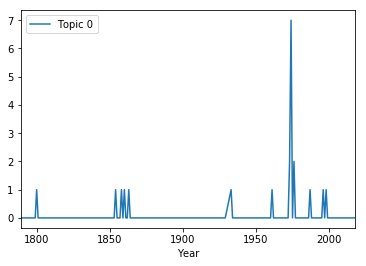

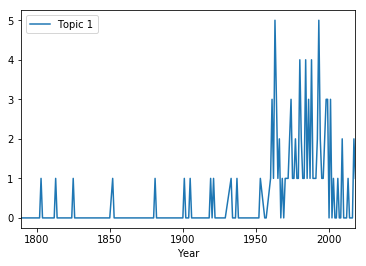

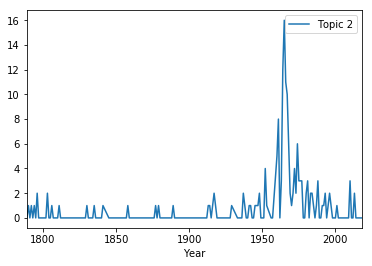

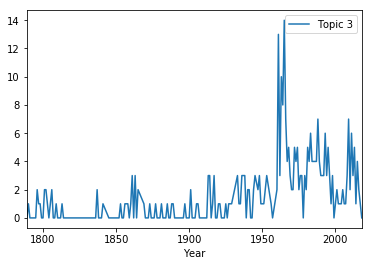

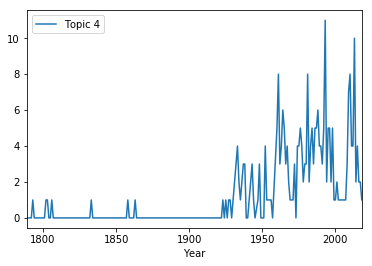

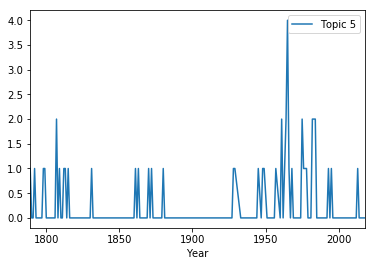

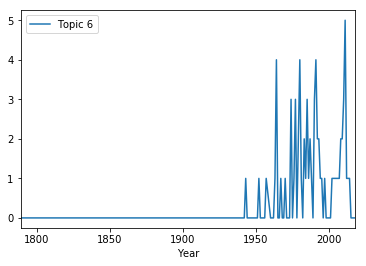

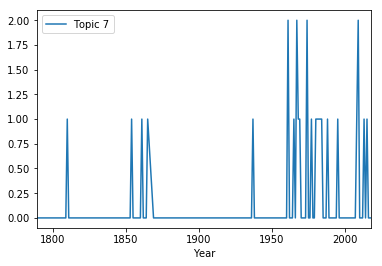

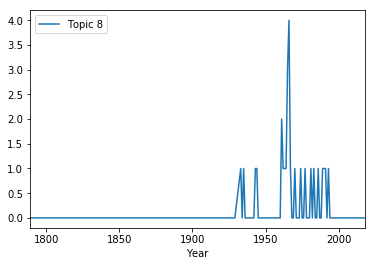

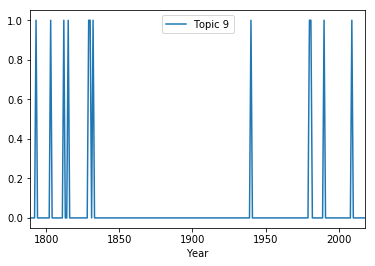

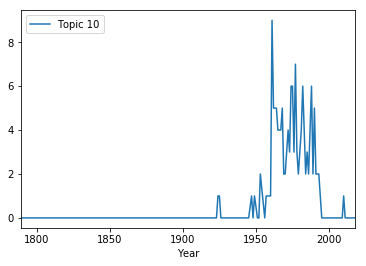

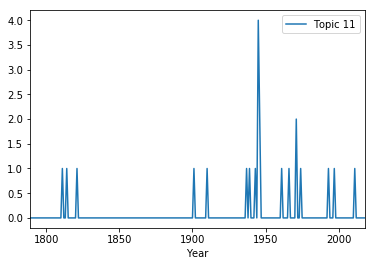

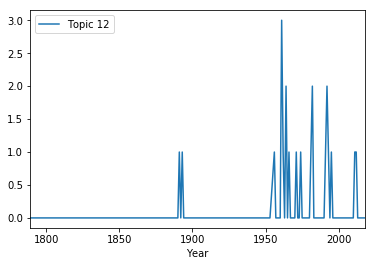

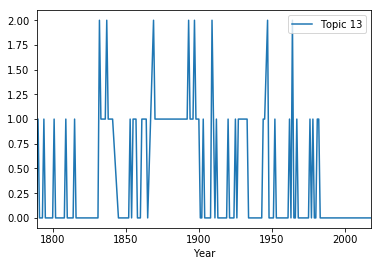

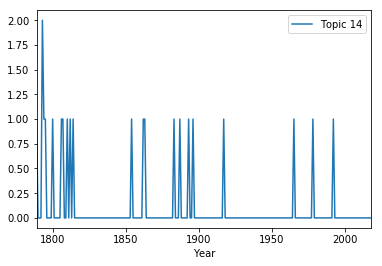

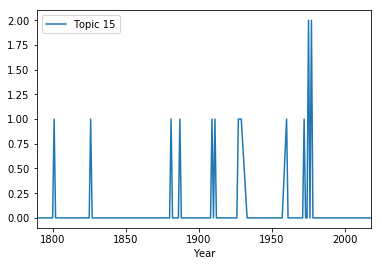

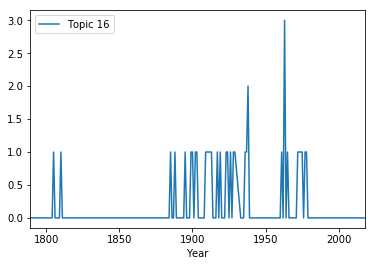

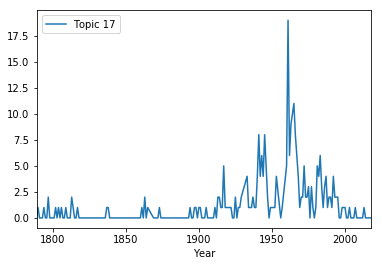

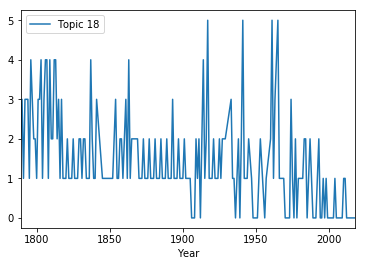

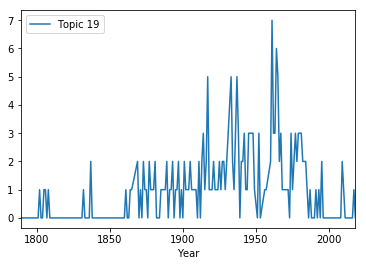

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

col_names = list(topic_counter)
col_names = col_names[1:]
col_names

for i in col_names:
    topic_counter.plot(kind='line', x='Year', y=i)

### We need to figure out a way to graph all of these as time series

# Part C: Presidents Trump aligns most with

In [20]:
presidents_df = doc_topics_df.loc[:,'Topic 0':'President']

pres_counter = presidents_df.groupby(['President']).mean()
# pres_counter = pres_counter.reset_index()
pres_counter = pres_counter.transpose()
pres_corr_df = pres_counter.corr()
pres_corr_df.nlargest(4,'Donald Trump')[1:]

President,Abraham Lincoln,Andrew Jackson,Andrew Johnson,Barack Obama,Benjamin Harrison,Bill Clinton,Calvin Coolidge,Chester Alan Arthur,Donald Trump,Dwight David Eisenhower,...,Rutherford Birchard Hayes,Theodore Roosevelt,Thomas Jefferson,Ulysses S. Grant,Warren Gamaliel Harding,William Henry Harrison,William Howard Taft,William McKinley,Woodrow Wilson,Zachary Taylor
President,,,,,,,,,,,,,,,,,,,,,
Bill Clinton,0.251262,-0.060483,0.228051,0.88640,-0.097859,1.000000,0.082594,-0.175873,0.842266,0.360505,...,-0.100360,0.087745,0.192765,-0.096437,0.137713,0.320154,-0.258980,-0.046150,0.151564,-0.039690
Barack Obama,0.219717,-0.066685,0.253788,1.00000,-0.081654,0.886400,0.071406,-0.166598,0.615893,0.190653,...,-0.085866,0.020048,0.163811,-0.093954,-0.021292,0.339730,-0.251686,-0.095941,0.069980,-0.073002
George W. Bush,0.212824,-0.096725,0.227756,0.84417,-0.132103,0.823159,-0.034229,-0.179685,0.605664,0.301769,...,-0.145618,0.029914,0.149931,-0.122423,0.053584,0.363103,-0.277628,-0.081119,0.094455,-0.058197


In [21]:
cos_df = presidents_df.groupby(['President']).sum()
names = cos_df.reset_index()
temp = cos_df.T

cos_df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
President,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,4,1,1,9,2,2,0,2,0,0,0,0,0,4,2,0,0,4,14,2
Andrew Jackson,0,0,2,1,1,1,0,0,0,3,0,0,0,6,0,0,0,1,13,2
Andrew Johnson,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
Barack Obama,0,2,5,31,42,1,12,5,0,1,1,1,2,0,0,0,0,1,2,3
Benjamin Harrison,0,0,1,1,0,0,0,0,0,0,0,0,1,4,0,0,0,0,5,4
Bill Clinton,2,17,5,23,32,2,4,1,1,0,3,2,2,0,0,0,0,8,4,3
Calvin Coolidge,0,0,0,2,3,1,0,0,0,0,2,0,0,3,0,2,4,3,8,8
Chester Alan Arthur,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,4,1
Donald Trump,0,3,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
import math as m

cosine_df = pd.DataFrame(columns=names['President'], index=names['President'])

for pres1, series in list(cosine_df.iterrows()):
    for pres2 in series.index:
        if pres1 != pres2:
            cosine_df[pres2].loc[pres1] = temp[pres1].dot(temp[pres2]) / (m.sqrt((temp[pres1]**2).sum())*m.sqrt((temp[pres2]**2).sum()))

cosine_df = cosine_df.fillna(1)
cosine_df = cosine_df.replace(to_replace=0, value=0.01)

cosine_df.nlargest(4,'Donald Trump')[1:]

President,Abraham Lincoln,Andrew Jackson,Andrew Johnson,Barack Obama,Benjamin Harrison,Bill Clinton,Calvin Coolidge,Chester Alan Arthur,Donald Trump,Dwight David Eisenhower,...,Rutherford Birchard Hayes,Theodore Roosevelt,Thomas Jefferson,Ulysses S. Grant,Warren Gamaliel Harding,William Henry Harrison,William Howard Taft,William McKinley,Woodrow Wilson,Zachary Taylor
President,,,,,,,,,,,,,,,,,,,,,
Bill Clinton,0.481474,0.197875,0.387395,0.908782,0.179023,1.000000,0.379239,0.072880,0.865216,0.572900,...,0.184512,0.316079,0.394521,0.172164,0.351543,0.427014,0.102800,0.256893,0.391478,0.089465
Barack Obama,0.415472,0.147090,0.383000,1.000000,0.142736,0.908782,0.317881,0.034762,0.683991,0.409844,...,0.145501,0.222503,0.336769,0.126347,0.188071,0.429988,0.045605,0.166035,0.286490,0.036854
George W. Bush,0.426521,0.139899,0.371021,0.877367,0.120673,0.867617,0.262716,0.040076,0.679289,0.504962,...,0.117044,0.245589,0.339120,0.120925,0.262351,0.454406,0.048195,0.196673,0.321480,0.058421


In [23]:
cosine_df

President,Abraham Lincoln,Andrew Jackson,Andrew Johnson,Barack Obama,Benjamin Harrison,Bill Clinton,Calvin Coolidge,Chester Alan Arthur,Donald Trump,Dwight David Eisenhower,...,Rutherford Birchard Hayes,Theodore Roosevelt,Thomas Jefferson,Ulysses S. Grant,Warren Gamaliel Harding,William Henry Harrison,William Howard Taft,William McKinley,Woodrow Wilson,Zachary Taylor
President,,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,1.000000,0.817742,0.774845,0.415472,0.720764,0.481474,0.704444,0.699696,0.240077,0.701674,...,0.689597,0.600192,0.922791,0.750050,0.723225,0.873068,0.607352,0.776047,0.779451,0.751559
Andrew Jackson,0.817742,1.000000,0.614476,0.147090,0.858757,0.197875,0.720865,0.889817,0.089245,0.483809,...,0.823131,0.553317,0.876887,0.873460,0.651751,0.658505,0.752577,0.803536,0.652705,0.864747
Andrew Johnson,0.774845,0.614476,1.000000,0.383000,0.745356,0.387395,0.766131,0.495074,0.258199,0.669439,...,0.748455,0.877876,0.800012,0.709568,0.824958,0.816497,0.544331,0.685994,0.842115,0.577350
Barack Obama,0.415472,0.147090,0.383000,1.000000,0.142736,0.908782,0.317881,0.034762,0.683991,0.409844,...,0.145501,0.222503,0.336769,0.126347,0.188071,0.429988,0.045605,0.166035,0.286490,0.036854
Benjamin Harrison,0.720764,0.858757,0.745356,0.142736,1.000000,0.179023,0.818491,0.885615,0.144338,0.503506,...,0.973729,0.785196,0.734891,0.968687,0.737865,0.547723,0.806369,0.869227,0.727533,0.645497
Bill Clinton,0.481474,0.197875,0.387395,0.908782,0.179023,1.000000,0.379239,0.072880,0.865216,0.572900,...,0.184512,0.316079,0.394521,0.172164,0.351543,0.427014,0.102800,0.256893,0.391478,0.089465
Calvin Coolidge,0.704444,0.720865,0.766131,0.317881,0.818491,0.379239,1.000000,0.657438,0.313206,0.707149,...,0.825370,0.870382,0.748196,0.820202,0.842701,0.521286,0.860122,0.868636,0.838233,0.589768
Chester Alan Arthur,0.699696,0.889817,0.495074,0.034762,0.885615,0.072880,0.657438,1.000000,0.038348,0.343473,...,0.828663,0.506197,0.680803,0.920746,0.525105,0.485071,0.788241,0.815083,0.505976,0.685994
Donald Trump,0.240077,0.089245,0.258199,0.683991,0.144338,0.865216,0.313206,0.038348,1.000000,0.377124,...,0.158114,0.360000,0.209354,0.130175,0.319505,0.158114,0.079057,0.132842,0.222375,0.010000


In [24]:
temp = cosine_df.nlargest(4,'Donald Trump')
my_list = temp.index.tolist()
my_list

['Donald Trump', 'Bill Clinton', 'Barack Obama', 'George W. Bush']

## Part D - Has Trump's Speech

In [75]:
trump_df = doc_topics_df.tail(3)
trump_df['Doc Topics']

663       [(1, 0.602165), (3, 0.27076), (4, 0.125722)]
664    [(1, 0.515494), (4, 0.464178), (19, 0.0123387)]
665                     [(1, 0.598192), (4, 0.401443)]
Name: Doc Topics, dtype: object

#### Needs elaboration - but no, it seems it has not changed

## Part E - K-means clustering / are trump and 3 'most similar' presidents in the same cluster

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 20)
km.fit(cosine_df)
clusters = km.labels_.tolist()

kmeansDF = pd.DataFrame(columns = ['President','Cluster No.'])
kmeansDF['President'] = sorted(set(president))
kmeansDF['Cluster No.'] = clusters
kmeansDF

,President,Cluster No.
0,Abraham Lincoln,6
1,Andrew Jackson,15
2,Andrew Johnson,7
3,Barack Obama,19
4,Benjamin Harrison,9
5,Bill Clinton,1
6,Calvin Coolidge,13
7,Chester Alan Arthur,5
8,Donald Trump,8
9,Dwight David Eisenhower,10


## Part F - visualization of K-means (with colors) and cosine scores using MDS

### MDS Map with Cosine Similarity showing K-means Clustering

['Donald Trump', 'Bill Clinton', 'Barack Obama', 'George W. Bush']


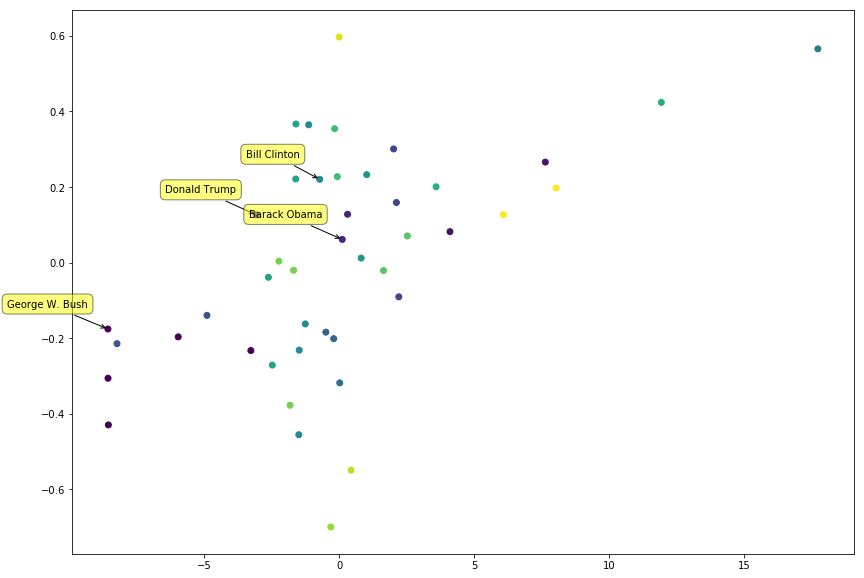

In [36]:
import numpy as np
from sklearn import manifold
plt.rcParams['figure.figsize'] = (14,10)

dissimilarity = 1/cosine_df
dissimilarityarray = np.array(dissimilarity)

mds = manifold.MDS(dissimilarity="precomputed")
MDSResult = mds.fit(dissimilarityarray)
locations = MDSResult.embedding_

plt.scatter(locations[:, 0],locations[:, 1],c=km.labels_)

labels = my_list

print labels

for label, x, y in zip(labels, locations[-4:, 0],locations[-4:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()